<a href="https://colab.research.google.com/github/kerycheng/Python_machine_learning_notebook/blob/main/Linear_Regression_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files #匯入套件

upload = files.upload() #開啟上傳介面並載入

Saving Boston.csv to Boston.csv


In [3]:
import numpy as np
import pandas as pd

波士頓房價數據集說明
* crim 房屋所在鎮的犯罪率
* zn 面積大於25000平方英尺住宅所佔的比例
* indus 房屋所在鎮非零售區域所佔比例
* chas 房屋是否位於河邊, 是:1 否:0
* nox 一氧化氮的濃度
* rm 平均房間數量
* age 1940年前建成房屋所佔比例
* dis 房屋距離波士頓五大就業中心的加權距離
* rad 距離房屋最近的公路
* tax 財產稅收額度
* ptratio 房屋所在鎮師生比例
* black 計算公式: 1000 * (房屋所在鎮非美籍人口所在比例 - 0.63) ** 2
* lstat 弱勢群體人口所佔比例
* medv 房屋平均價格



In [23]:
data = pd.read_csv(r'Boston.csv', index_col=0)
#data

# 查看數據的基本訊息
# data.info()

# 查看是否有重複值
data.duplicated().any()

False

In [30]:
class LinearRegression:

  def fit(self, X, y):
    '''
    根據提供的訓練數據X, 對模型進行訓練

    X -> array-like type [樣本數量, 特徵數量] 特徵矩陣, 用來對模型進行訓練
    y -> array-like type [樣本數量]
    '''

    # 如果X是數組對象的一部分, 而不是完整的對象數據(ex.X是由其他對象通過切片傳遞過來)則無法完成矩陣的時候
    # 創建X的複製對象, 避免轉換矩陣的時候失敗
    X = np.asmatrix(X.copy())
    
    # y是一維結構(行向量or列向量), 可以不用複製
    # 通過reshape轉換成二維結構
    y = np.asmatrix(y).reshape(-1, 1)

    # 通過最小二乘公式, 求解出最佳的權重值
    self.w_ = (X.T * X).I * X.T * y

  def predict(self, X):
    '''
    根據參數傳遞的樣本X, 對樣本數據進行預測
    X -> array-like type [樣本數量, 特徵數量] 待預測的樣本特徵(屬性)
    result -> array type 預測的結果
    '''

    # 將X轉換成矩陣
    X = np.asmatrix(X.copy())
    result = X * self.w_
    
    # 將矩陣轉換成ndarray數組, 進行扁平化處理返回結果
    return np.array(result).ravel()

In [35]:
# 不考慮截距的情況
np.random.seed(0)
t = data.sample(len(data))
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y) ** 2))

# 查看模型的權重值
display(lr.w_)

17.01190553363417

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

In [36]:
# 考慮截距, 增加一列, 該列的所有值都是1
np.random.seed(0)
t = data.sample(len(data))
new_columns = t.columns.insert(0, 'intercept')

# 重新安排列的順序, 如果值為空, 則使用fill_value參數指定進行填充
t = t.reindex(columns=new_columns, fill_value=1)

train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y) ** 2))
display(lr.w_)

17.097531384667533

matrix([[ 4.00542166e+01],
        [-1.10490198e-01],
        [ 4.11074548e-02],
        [ 1.14986147e-02],
        [ 2.03209693e+00],
        [-1.95402764e+01],
        [ 3.28900304e+00],
        [ 6.91671720e-03],
        [-1.39738261e+00],
        [ 3.78327573e-01],
        [-1.54938397e-02],
        [-8.64470498e-01],
        [ 8.29999966e-03],
        [-5.66991979e-01]])

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

# 設置在中文字體時能正常顯示負號(-)
plt.rcParams['axes.unicode_minus'] = False

--2023-01-09 05:52:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.135.102, 74.125.135.139, 74.125.135.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/301d38o3fkk6sgo7g2alp5oufn5lbc6s/1673243475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=00e1293c-b9c8-4806-8daa-0867eef491c0 [following]
--2023-01-09 05:52:28--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/301d38o3fkk6sgo7g2alp5oufn5lbc6s/1673243475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=00e1293c-b9c8-4806-8daa-0867eef491c0
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0k

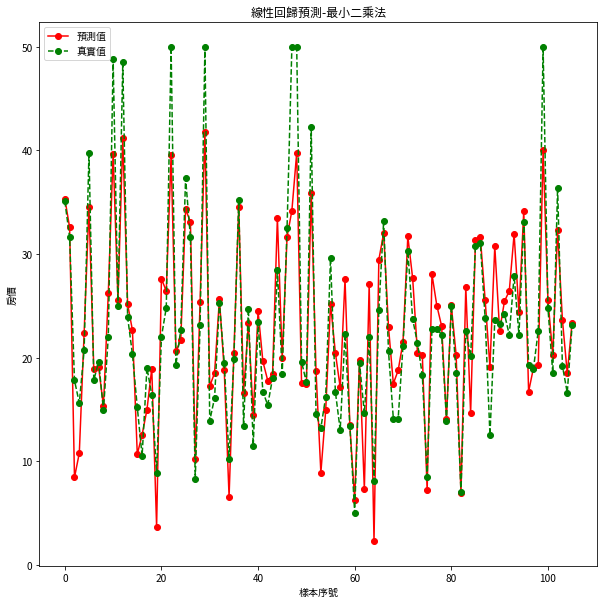

In [39]:
plt.figure(figsize=(10, 10))

# 繪製預測值
plt.plot(result, 'ro-', label='預測值')

# 預測真實值
plt.plot(test_y.values, 'go--', label='真實值')
plt.title('線性回歸預測-最小二乘法')
plt.xlabel('樣本序號')
plt.ylabel('房價')
plt.legend()
plt.show()